In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import linalg as la
import sys
import cv2
import matplotlib.pyplot as plt
import seaborn as sas
import os
import csv
import re
import matplotlib.image as img

In [2]:
class Dataset:
    def __init__(self, values, subject):
        self.values = values
        self.subject = subject
 

In [3]:
# dict Position, file
labels = {
    'Adam Sandler': '0',
    'Alyssa Milano': '1',
    'Bruce Willis': '2',
    'Denise Richards': '3',
    'George Clooney': '4',
    'Gwyneth Paltrow': '5',
    'Hugh Jackman': '6',
    'Jason Statham': '7',
    'Jennifer Love Hewitt': '8',
    'Lindsay Lohan': '9',
    'Mark Ruffalo': '10',
    'Robert Downey Jr': '11',
    'Will Smith': '12'
}

'''def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result'''

def true_label(actor_name):
    actor_name = actor_name[16:]
    actor_name = re.sub('newcpp_', '', actor_name)
    actor_name = re.sub('.jpg', '', actor_name)
    actor_name = re.sub('[/0123456789]', '', actor_name)
    return actor_name

def get_label(actor_name):
    actor_number = labels.get(actor_name)
    return actor_number
 

222
data/PeopleFace/Adam Sandler/newcpp_8.jpg


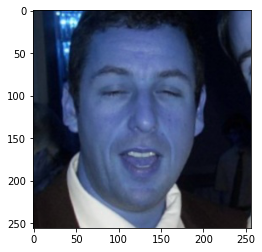

In [4]:
# collects data 
rootdir = Path("data/PeopleFace/")

pixels = []
dataset = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        
        file_name = os.path.join(subdir, file)
        
        #TODO: remove this if
        if '.DS_Store' in file_name:
            continue
        
        image = cv2.imread(file_name)  
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #rotate = rotate_image(gray, find angle or way to rotate)
        pixels = gray.reshape((65536, ))
        subject = true_label(file_name)
        subject = get_label(subject)
            
        data = Dataset(pixels, subject)
        dataset.append(data)

print(len(dataset))
print(file_name)
plt.imshow(image, cmap='gray')
plt.show()


In [5]:
# write in csv
headers = []

for i in range(1, 257):
    for j in range(1, 257):
        header = "{} x {}".format(i, j)
        headers.append(header)

headers.append('Subject')

with open('dataset.csv', mode='w') as csv_file:
    fieldnames = headers
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for item in dataset:
        
        row = {}
        for i in range(0, len(item.values) + 1):

            if headers[i] == 'Subject':
                row[headers[i]] = item.subject

            else:
                row[headers[i]] = item.values[i]
        
        writer.writerow(row)
